In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style

In [2]:
df=pd.read_csv("AirBNB.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [5]:
df=df.drop('id', axis=1)

In [6]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [8]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [9]:
df.describe(include='all')

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


In [10]:
for column in df.columns:
    if df[column].dtype=='object':
        print(column, ':', df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')
        
    

room_type : 3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


cancellation_policy : 3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


cleaning_fee : 2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


instant_bookable : 2
t    19451
f    54660
Name: instant_bookable, dtype: int64




## Converting instant_bookable into boolean 

In [11]:
df.instant_bookable.replace(['f','t'], [False,True], inplace=True)

In [12]:
df.instant_bookable.dtype

dtype('bool')

## Converting Data Type to Object

In [13]:
df.instant_bookable.astype("object")

0        False
1         True
2         True
3        False
4         True
         ...  
74106    False
74107    False
74108     True
74109     True
74110    False
Name: instant_bookable, Length: 74111, dtype: object

In [14]:
df.instant_bookable.dtype

dtype('bool')

In [15]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,False,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,True,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,True,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,False,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,True,40.0,0.0,1.0,4.744932


In [16]:
df=pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee', 'instant_bookable'], drop_first=True)

In [17]:
df

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,NaN,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74106,1.0,1.0,NaN,1.0,1.0,4.605170,1,0,0,0,0,0
74107,4.0,2.0,93.0,2.0,4.0,5.043425,0,0,1,0,1,0
74108,5.0,1.0,94.0,2.0,2.0,5.220356,0,0,1,0,1,1
74109,2.0,1.0,NaN,0.0,2.0,5.273000,0,0,0,1,1,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  74108 non-null  float64
 1   bathrooms                     73908 non-null  float64
 2   review_scores_rating          57389 non-null  float64
 3   bedrooms                      74019 non-null  float64
 4   beds                          73980 non-null  float64
 5   log_price                     74111 non-null  float64
 6   room_type_Private room        74111 non-null  uint8  
 7   room_type_Shared room         74111 non-null  uint8  
 8   cancellation_policy_moderate  74111 non-null  uint8  
 9   cancellation_policy_strict    74111 non-null  uint8  
 10  cleaning_fee_True             74111 non-null  uint8  
 11  instant_bookable_True         74111 non-null  uint8  
dtypes: float64(6), uint8(6)
memory usage: 3.8 MB


In [19]:
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
instant_bookable_True               0
dtype: int64

## Imputing missing values

In [20]:
for column in df.columns:
    if df[column].dtype!='object':
        mean=df[column].mean()
        df[column]=df[column].fillna(mean)
        
df.isnull().sum()

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
dtype: int64

In [21]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1,1


In [22]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069,0.413366,0.029186,0.257182,0.438531,0.734021,0.262458
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394,0.492441,0.168329,0.437083,0.496211,0.441856,0.439973
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking for duplicates

In [23]:
dups= df.duplicated()

In [24]:
print('Number of duplicates:%d'%(dups.sum()))

Number of duplicates:19998


In [25]:
df.shape

(74111, 12)

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(54113, 12)

## Correlation Plot

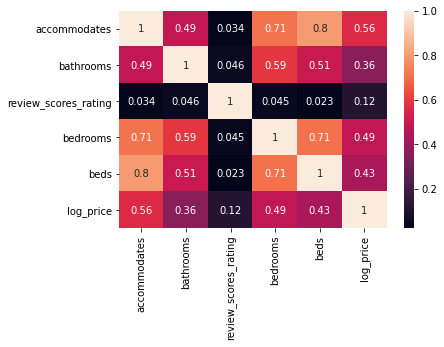

In [28]:
sns.heatmap(df.iloc[:,0:6].corr(), annot=True)
plt.show()

The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.

In [29]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54113 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54113 non-null  float64
 1   bathrooms                     54113 non-null  float64
 2   review_scores_rating          54113 non-null  float64
 3   bedrooms                      54113 non-null  float64
 4   beds                          54113 non-null  float64
 5   log_price                     54113 non-null  float64
 6   room_type_Private room        54113 non-null  uint8  
 7   room_type_Shared room         54113 non-null  uint8  
 8   cancellation_policy_moderate  54113 non-null  uint8  
 9   cancellation_policy_strict    54113 non-null  uint8  
 10  cleaning_fee_True             54113 non-null  uint8  
 11  instant_bookable_True         54113 non-null  uint8  
dtypes: float64(6), uint8(6)
memory usage: 3.2 MB


## Outlier Checks

Constructing box plot for continuous variables

In [31]:
cont=df.dtypes[(df.dtypes!='uint8')& (df.dtypes!='bool')].index

In [32]:
cont

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price'],
      dtype='object')

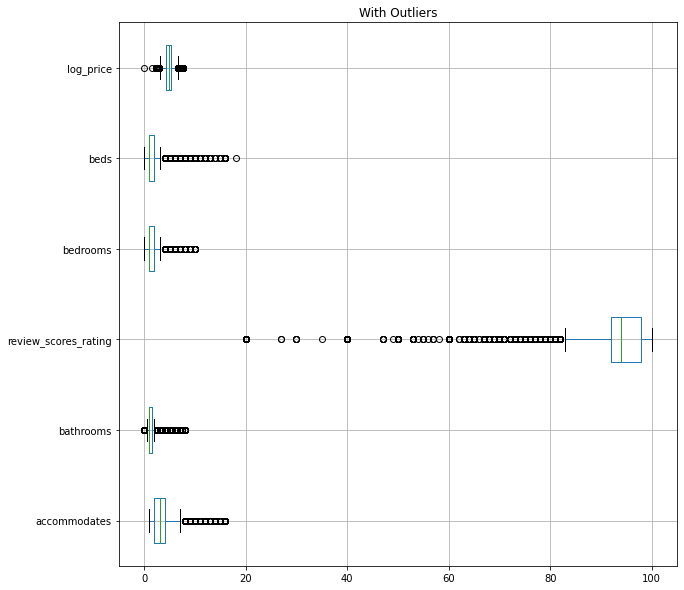

In [33]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers')
plt.show()

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [35]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

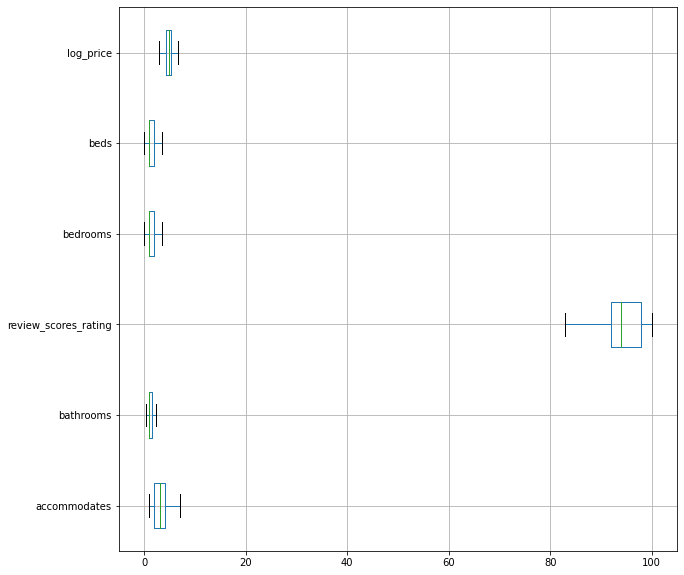

In [36]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)


## Data Distribution

In [41]:
df_attr=(df[cont])

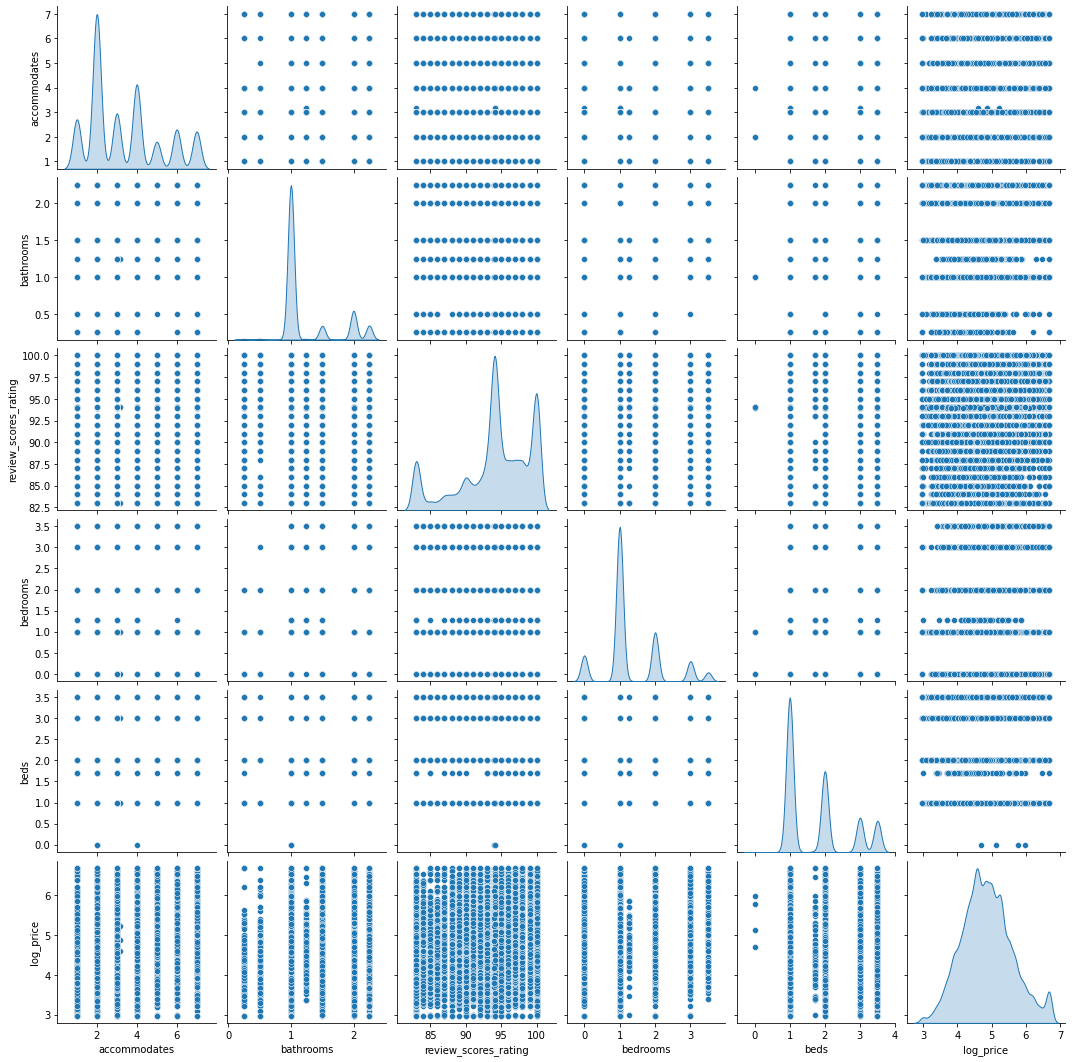

In [42]:
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

## Train-Test Split

In [43]:
X=df.drop('log_price', axis=1)

In [50]:
y=df[['log_price']]

In [51]:
X.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,0,0,0,1,1,0
1,7.0,1.0,93.000000,3.0,3.0,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,3.0,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,0,0,0,0,1,0
4,2.0,1.0,83.000000,0.0,1.0,0,0,1,0,1,1


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=1)

In [54]:
regression_model=LinearRegression()

In [55]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [57]:
intercept=regression_model.intercept_[0]

In [58]:
print('The intercept of the model is {}'.format(intercept))

The intercept of the model is 3.429263801775859


In [59]:
# R square on training data

In [60]:
regression_model.score(X_train, y_train)

0.5082917563299905

In [65]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

0.5159255811569989

In [64]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)

In [67]:
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.5197867614388492

## Linear Regression using statsmodels(OLS)

In [69]:
import statsmodels.api as sm

In [70]:
X_train=sm.add_constant(X_train)

In [71]:
X_test=sm.add_constant(X_test)

In [72]:
model=sm.OLS(y_train, X_train).fit()

In [73]:
model

In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3813.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:53:32   Log-Likelihood:                -30728.
No. Observations:               40584   AIC:                         6.148e+04
Df Residuals:                   40572   BIC:                         6.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.4293      0.050     67.981      0.000       3.330       3.528
accommodates                     0.0951      0.003     33.288      0.000       0.089       0.101
bathrooms                        0.1808      0.007     25.690      0.000       0.167       0.195
review_scores_rating             0.0117      0.001     22.275      0.000       0.011       0.013
bedrooms                         0.1581      0.005     32.798      0.000       0.149       0.168
beds                            -0.0451      0.005     -8.599      0.000      -0.055      -0.035
room_type_Private room          -0.6116      0.007    -93.327      0.000      -0.624      -0.599
room_type_Shared room           -1.0818      0.015    -72.867      0.000      -1.111      -1.053
cancellation_policy_moderate    -0.0600      0.007     -8.318      0.000      -0.074      -0.046
cancellation_policy_strict      -0.0058      0.007     -0.887      0.375      -0.019       0.007
cleaning_fee_True               -0.0819      0.006    -12.945      0.000      -0.094      -0.069
instant_bookable_True           -0.0650      0.006    -11.560      0.000      -0.076      -0.054
==============================================================================
Omnibus:                     2618.685   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4228.792
Skew:                           0.519   Prob(JB):                         0.00
Kurtosis:                       4.192   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
#Calculating MSE on train

predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)


In [77]:
np.sqrt(mse)

0.515925581156999

In [78]:
#Prediction on the test data

y_pred=model.predict(X_test)

In [79]:
#Calculating MSE on test

In [80]:
mse=metrics.mean_squared_error(y_test,y_pred)

In [81]:
np.sqrt(mse)

0.5197867614388498

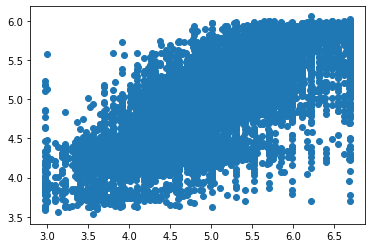

In [82]:
plt.scatter(y_test, y_pred)

In [83]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.43) * const + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_Private room + (-1.08) * room_type_Shared room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True + (-0.07) * instant_bookable_True + 

The final Linear Regression equation is

log_price = b0 + b1 * instant_bookable_True + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True

log_price = (3.43) * Intercept + (-0.07) * instant_bookable_True + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True

When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant ,When no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant ,etcc....

There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant. etc..


#### Observations:
    
1) There is a Decrement in Price of the property by a larger factor if the rooms are Shared rather than Private .

2) There is a Decrement in Price of the property by a larger factor if the property has a Strict Cancellation Policy rather than a Moderate Cancellation Policy.

3) More the number of bedrooms/bathrooms the price of the property goes up a little

4) while More the number of beds the price of the property goes down a little . 